# The Problem of Overfitting

Consider the problem of predicting $y$ from $x \in R$. The leftmost figure below shows the result of fitting a $y = \theta_0+\theta_1x$ to a dataset. We see that the data doesn’t really lie on straight line, and so the fit is not very good.

![](img/26.png)

Instead, if we had added an extra feature $x^2$ , and fit $y=\theta_0+\theta_1x+\theta_2x^2$ , then we obtain a slightly better fit to the data (See middle figure). Naively, it might seem that the more features we add, the better. 

However, there is also a **danger** in adding too many features: The rightmost figure is the result of fitting a 5th order polynomial $y = \sum_{j=0} ^5 \theta_j x^j$. We see that even though the fitted curve passes through the data *perfectly*, we would not expect this to be a very good predictor of, say, housing prices (y) for different living areas (x). 

Without formally defining what these terms mean, we’ll say the figure on the left shows an instance of **underfitting**—in which the data clearly shows structure not captured by the model—and the figure on the right is an example of **overfitting**.

**Underfitting**, or high bias, is when the form of our hypothesis function h maps poorly to the trend of the data. It is usually caused by a function that is too simple or uses too few features. 

At the other extreme, **overfitting**, or high variance, is caused by a hypothesis function that fits the available data but does not generalize well to predict new data. It is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data.

This terminology is applied to both linear and logistic regression. There are two main options to address the issue of overfitting:

### วิธีการแก้ปัญหา Overfitting ทำได้โดย

1) Reduce the number of features:
- Manually select which features to keep.
- Use a model selection algorithm (studied later in the course).

2) Regularization
- Keep all the features, but reduce the magnitude of parameters $\theta_j$.
- Regularization works well when we have a lot of slightly useful features.





# Cost Function

If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their cost.

Say we wanted to make the following function more quadratic:

$\theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \theta_4x^4$

We'll want to eliminate the influence of $\theta_3x^3$ and $\theta_4x^4$ . Without actually getting rid of these features or changing the form of our hypothesis, we can instead modify our **cost function**:

$$min_\theta\ \dfrac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + 1000\cdot\theta_3^2 + 1000\cdot\theta_4^2$$

We've added two extra terms at the end to inflate the cost of $\theta_3$ and $\theta_4$. Now, in order for the cost function to get close to zero, we will have to reduce the values of $\theta_3$ and $\theta_4$ to near zero. This will in turn greatly reduce the values of $\theta_3x^3$ and $\theta_4x^4$ in our hypothesis function. As a result, we see that the new hypothesis (depicted by the pink curve) looks like a quadratic function but fits the data better due to the extra small terms $\theta_3x^3$ and $\theta_4x^4$.

![](img/27.png)

We could also regularize all of our theta parameters in a single summation as:

$$min_\theta\ \dfrac{1}{2m}\  \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\ \sum_{j=1}^n \theta_j^2$$

The $\lambda$, or lambda, is the **regularization parameter**. It determines how much the costs of our theta parameters are inflated.

Using the above cost function with the extra summation, we can smooth the output of our hypothesis function to reduce overfitting. **If lambda is chosen to be too large, it may smooth out the function too much and cause underfitting.** Hence, what would happen if λ=0 or is too small ? --> Overfitting

> มันเป็นการ trade-off ระหว่างจะ underfitting หรือ overfitting ถ้า $\lambda$ ใหญ่จะ under ตรงกันข้ามถ้า $\lambda$ เล็กก็จะ over

# Regularized Linear Regression
We can apply regularization to both linear regression and logistic regression. We will approach linear regression first.

### Gradient Descent
We will modify our gradient descent function to **separate out $\theta_0$ from the rest of the parameters** because we do not want to penalize $\theta_0$.

$\begin{align*} & \text{Repeat}\ \lbrace \newline & \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline & \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline & \rbrace \end{align*}$

(ลอง Prove ด้วย Calculus ดู)

The term $\frac{\lambda}{m}\theta_j$ performs our regularization. With some manipulation our update rule can also be represented as:

$\theta_j := \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$

The first term in the above equation,** $1 - \alpha\frac{\lambda}{m}$ will always be less than 1**. Intuitively you can see it as reducing the value of $\theta_j$ by some amount on every update. Notice that the second term is now exactly the same as it was before.

### Normal Equation

Now let's approach regularization using the alternate method of the non-iterative normal equation.

To add in regularization, the equation is the same as our original, except that we add another term inside the parentheses:

$\begin{align*}& \theta = \left( X^TX + \lambda \cdot L \right)^{-1} X^Ty \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix} \in \mathbb{R}^{(n+1)x(n+1)}\end{align*}$

L is a matrix with 0 at the top left and 1's down the diagonal, with 0's everywhere else. It should have dimension (n+1)×(n+1). Intuitively, this is the identity matrix (though we are not including x0), multiplied with a single real number $λ$.

Recall that if m < n, then $X^TX$ is non-invertible. However, when we add the term $λ⋅L$, then $X^TX + λ⋅L$ becomes invertible.

# Regularized Logistic Regression
We can regularize logistic regression in a similar way that we regularize linear regression. As a result, we can avoid overfitting. The following image shows how the regularized function, displayed by the pink line, is less likely to overfit than the non-regularized function represented by the blue line:

![](img/29.png)

### Cost Function
Recall that our cost function for logistic regression was:

$J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)})) \large]$

We can regularize this equation by adding a term to the end:

$J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$

*Note : Prove หน่อย*

The second sum, $\sum_{j=1}^n \theta_j^2$ **means to explicitly** exclude the bias term, $\theta_0$. I.e. the $\theta$ vector is indexed from 0 to n (holding n+1 values, $\theta_0$ through $\theta_n$), and this sum explicitly skips $\theta_0$, by running from 1 to n, skipping 0. Thus, when computing the equation, we should continuously update the two following equations:

![](img/30.png)

### Prove + Code ส่วนนี้ด้วย

![](img/28.png)

# ====================== CODE =========================

 ข้อมูลชิพที่ผ่าน และไม่ผ่าน คุณภาพการผลิต

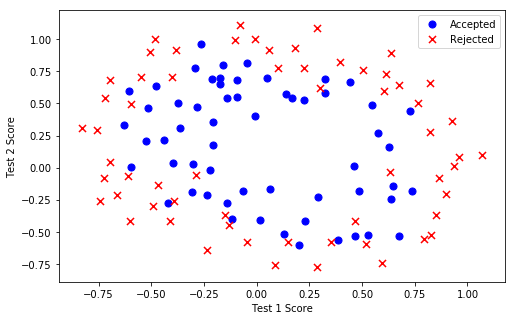

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt 
import numpy as np

data2 = pd.read_csv('programing/machine-learning-ex2/ex2/ex2data2.txt',names=['Test 1','Test 2','Accepted'])

positive = data2[data2['Accepted'].isin([1])]  
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(8,5))  
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')  
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score') 
plt.show()

จากรูป ดูทรงแล้ว Decision Boundary น่าจะเป็นสมการกำลังเลขคู่ (2,4,6) ถ้าลองที่กำลัง 6 จะได้

$$
\begin{align}
z = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_1x_2 + \theta_5x_2^2 + \theta_6x_1^3 + \theta_7x_1^2x_2 + \theta_8x_1x_2^2 + \theta_9x_2^3 + \theta_{10}x_1^4 + \theta_{11}x_1^3x_2 + \theta_{12}x_1^2x_2^2 + \theta_{13}x_1x_2^3 + \theta_{14}x_2^4 + \theta_{15}x_1^5 + \theta_{16}x_1^4x_2^1 + \theta_{17}x_1^3x_2^2 + \theta_{18}x_1^2x_2^3 + \theta_{19}x_1x_2^4 + \theta_{20}x_2^5 + \theta_{21}x_1^6 + \theta_{22}x_1^5x_2^1 + \theta_{23}x_1^4x_2^2 + \theta_{24}x_1^3x_2^3 + \theta_{25}x_1^2x_2^4 + \theta_{26}x_1x_2^5 + \theta_{27}x_2^6
\end{align}
$$

จะเห็นว่าสมการมันไม่ linear อยู่ แปลงให้เป็น linear จะได้

$$
\begin{align}
z = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_5 + \theta_6x_6 + \theta_7x_7 + \theta_8x_8 + \theta_9x_9 + \theta_{10}x_{10} + \theta_{11}x_{11} + \theta_{12}x_{12} + \theta_{13}x_{13} + \theta_{14}x_{14} + \theta_{15}x_{15} + \theta_{16}x_{16} + \theta_{17}x_{17} + \theta_{18}x_{18} + \theta_{19}x_{19} + \theta_{20}x_{20} + \theta_{21}x_{21} + \theta_{22}x_{22} + \theta_{23}x_{23} + \theta_{24}x_{24} + \theta_{25}x_{25} + \theta_{26}x_{26} + \theta_{27}x_{27}
\end{align}
$$

ดังนั้นจาก ค่า $x_1,x_2$ ที่เรามีอยู่แล้ว เราต้องหาค่า $x_3 - x_{27}$ เพิ่มด้วย 

สร้างฟังก์ชั่นสำหรับแปลง $x_1,x_2$ เป็น $x_1 - x_n$ (จำนวน $n$ ขึ้นกับ degree ของสมการ เช่นที่ degree 6 $n$ คือ 27)

In [38]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [39]:
def mapFeature(degree,x1,x2):
    #   Returns a new feature array with more features, comprising of X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..    
    #   Inputs X1, X2 must be the same size
    
    df = pd.DataFrame()
    df['Ones'] = np.ones(len(x1))
    
    for i in range(1, degree+1):
        for j in range(0, i+1):
            df['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
    return df

In [40]:
x1 = data2['Test 1']
x2 = data2['Test 2']
features = mapFeature(6,x1,x2)
features.head()

,Ones,F10,F11,F20,F21,F22,F30,F31,F32,F33,...,F53,F54,F55,F60,F61,F62,F63,F64,F65,F66
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


เมื่อ regularize cost function เป็นแบบนี้

$J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$

จะได้

In [41]:
def costReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [42]:
def gradientReg(theta, X, y, learningRate):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    return grad

เตรียม Data ให้ format ถูก ลองใช้ `costReg`

In [43]:
# set X and y 
X2 = features.iloc[:,:]  
y2 = data2.iloc[:,2:3]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)  
y2 = np.array(y2.values)  
theta2 = np.zeros(len(X2[0]))

learningRate = 1

costReg(theta2, X2, y2, learningRate)  

0.6931471805599454

หาพารามิเตอร์ของ Decision Boundary จาก `fmin_tnc`

In [44]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))  
theta_min = result2[0]

จากพารามิเตอร์ที่ได้มา ลอง plot ดู decision boundary ดังนี้ (ที่ power = 6)

$$
\begin{align}
z = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_1x_2 + \theta_5x_2^2 + \theta_6x_1^3 + \theta_7x_1^2x_2 + \theta_8x_1x_2^2 + \theta_9x_2^3 + \theta_{10}x_1^4 + \theta_{11}x_1^3x_2 + \theta_{12}x_1^2x_2^2 + \theta_{13}x_1x_2^3 + \theta_{14}x_2^4 + \theta_{15}x_1^5 + \theta_{16}x_1^4x_2^1 + \theta_{17}x_1^3x_2^2 + \theta_{18}x_1^2x_2^3 + \theta_{19}x_1x_2^4 + \theta_{20}x_2^5 + \theta_{21}x_1^6 + \theta_{22}x_1^5x_2^1 + \theta_{23}x_1^4x_2^2 + \theta_{24}x_1^3x_2^3 + \theta_{25}x_1^2x_2^4 + \theta_{26}x_1x_2^5 + \theta_{27}x_2^6
\end{align}
$$

ดูจากทรงมันยากที่เราจะวาดเส้น decision boundary จาก การแก้สมการนี้ คิดว่าที่เป็นไปได้ก็คือ แทน x1,x2 ไปเลยในช่วงทั้งหมด แล้วน่าจะเห็นเส้นที่ z = 0 เส้นนั้นแหละคือ decision boundary

In [49]:
def plotDecisionBoundary(theta):
    # Here is the grid range
    test1 = np.arange(-1,1.5,0.1)
    test2 = np.arange(-1,1.5,0.1)

    z = np.zeros((len(test1),len(test2)))
    
    # Evaluate z = theta*x over the grid
    for t1 in range(len(test1)):
        for t2 in range(len(test2)):
            z[t1,t2] = mapFeature(6,np.array([test1[t1]]),np.array([test2[t2]]) ).values.dot(theta)[0]
         
    T1, T2 = np.meshgrid(test1, test2)
    fig, ax = plt.subplots(figsize=(8,5))  
    
    # Data Plot     
    ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')  
    ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')  
    # Decision Boundary     
    CS = plt.contour(T1, T2, z,0.00000000,colors='y')
    
    ax.legend()
    ax.set_xlabel('Test 1 Score')  
    ax.set_ylabel('Test 2 Score') 
    plt.show()

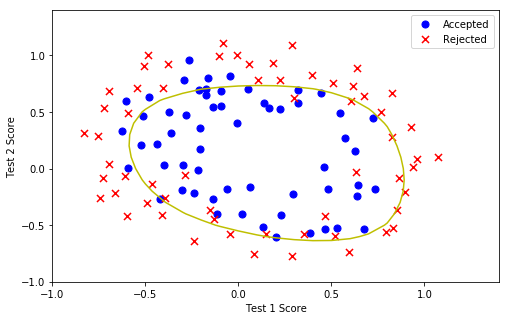

In [50]:
plotDecisionBoundary(theta_min)

สรุปคือ ที่ lambda = 1 decision boundary จะเป็นดังรูปข้างบน

## Predict
เมื่อได้ parameter ของ decision boundary มาแล้ว นำมาทดลองทำนายผลว่าจะเป็น 0 หรือ 1 ดังนี้

$
h_{\theta}(x) = g(z) = \frac{1}{1 + e^{-z}}
$

ถ้า $z>0$ จะได้ว่า $g(z)$ ลู่เข้า 1 ตรงกันข้าม ถ้า $z<0$ จะได้ว่า $g(z)$ ลู่เข้า 0 

In [51]:
def predict(theta, X):  
    z = X.dot(theta.T)
    predict = (z>=0)
    return predict

In [52]:
theta_min = np.matrix(result2[0])  
predictions = predict(theta_min, X2)  
correct = (y2 == predictions)
accuracy = sum(correct)[0,0]%len(correct) 
print('accuracy = {0}%'.format(accuracy))

accuracy = 95%


จากโปรแกรมข้างบนเราทดลองที่ lambda = 1 อย่างเดียว อยากรู้ว่า decision boundary จะเป็นอย่างไรเมื่อ lambda เป็นค่าอื่นๆ

ก่อนอื่นเราฟังชั่นเก่ามาโมก่อน 

In [57]:
def plotDecisionBoundaryVaryLambda(X,y,lamb):
    theta2 = np.zeros(len(X[0]))
    
    result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X, y, lamb))  
    theta_min = result2[0]
    
    # Here is the grid range
    test1 = np.arange(-1,1.5,0.1)
    test2 = np.arange(-1,1.5,0.1)

    z = np.zeros((len(test1),len(test2)))
    
    # Evaluate z = theta*x over the grid
    for t1 in range(len(test1)):
        for t2 in range(len(test2)):
            z[t1,t2] = mapFeature(6,np.array([test1[t1]]),np.array([test2[t2]]) ).values.dot(theta_min)[0]
         
    T1, T2 = np.meshgrid(test1, test2)
    fig, ax = plt.subplots(figsize=(8,5))  
    
    # Data Plot     
    ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')  
    ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')  
    # Decision Boundary     
    CS = plt.contour(T1, T2, z,0.00000000,colors='y')
    
    ax.legend()
    ax.set_xlabel('Test 1 Score')  
    ax.set_ylabel('Test 2 Score') 
    plt.show()

ที่ lambda = 0

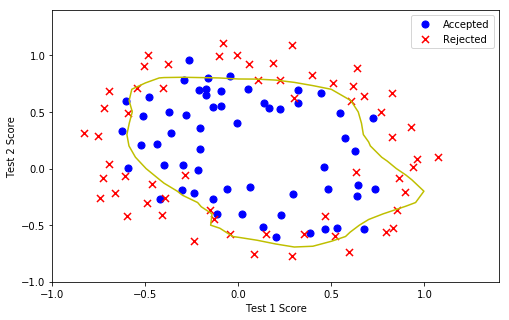

In [62]:
plotDecisionBoundaryVaryLambda(X2,y2,0)

จะเห็นว่า Overfitting หน่อยๆ

ที่ lambda = 100

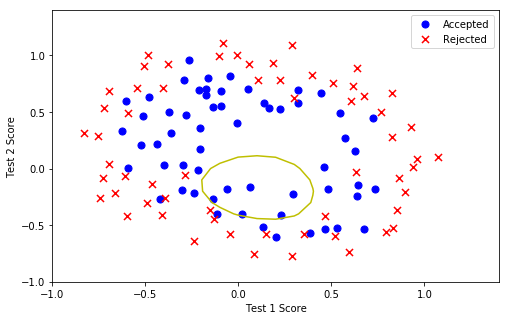

In [63]:
plotDecisionBoundaryVaryLambda(X2,y2,100)

จะเห็นว่า Underfitting มากๆ 